In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/S05-hw-dataset.csv')

In [4]:
display(df.head())

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

None

In [6]:
display(df.describe())

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [7]:
y = df['default']
y.value_counts(normalize=True).rename("fraction").to_frame()

,fraction
default,
0,0.589667
1,0.410333


In [8]:
df['client_id'].is_unique

True

В датасете 3000 объектов и 15 (17 - client_id - default) признаков.

В датасете нет пропусков и явно невозможных значений (все значения находятся в пределах своих диапазонов, нет повторов client_id).

59% объектов принадлежат к классу 0; 41% - к классу 1.

In [9]:
X = df.iloc[:, 1:-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

default
0    0.589583
1    0.410417
Name: proportion, dtype: float64
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [11]:
baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train, y_train)

dummy_pred = baseline.predict(X_test)
dummy_pred_proba = baseline.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, dummy_pred))
print("Precision :", precision_score(y_test, dummy_pred, zero_division=0))
print("Recall :", recall_score(y_test, dummy_pred, zero_division=0))
print("F1 :", f1_score(y_test, dummy_pred, zero_division=0))

try:
    print("ROC-AUC :", roc_auc_score(y_test, dummy_pred_proba))
except ValueError as e:
    print("Ошибка при подсчете ROC-AUC:", e)

Accuracy : 0.59
Precision : 0.0
Recall : 0.0
F1 : 0.0
ROC-AUC : 0.5


Бейзлайн - простая модель, которая всегда возвращает наиболее частый класс - 0.
Бейзлайн важен, чтобы видеть нижнюю планку качества, после которой модель становится бесполезной.


In [37]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='liblinear',
        random_state=42,
    ))
])

model.fit(X_train, y_train)

y_pred_best = model.predict(X_test)
y_pred_proba_best = model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision :", precision_score(y_test, y_pred_best, zero_division=0))
print("Recall :", recall_score(y_test, y_pred_best, zero_division=0))
print("F1 :", f1_score(y_test, y_pred_best, zero_division=0))
print("ROC-AUC :", roc_auc_score(y_test, y_pred_proba_best))
print("Confusion matrix :", confusion_matrix(y_test, y_pred_best))

print(classification_report(y_test, y_pred_best))

Accuracy : 0.8
Precision : 0.794392523364486
Recall : 0.6910569105691057
F1 : 0.7391304347826086
ROC-AUC : 0.8756258325295118
Confusion matrix : [[310  44]
 [ 76 170]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.79      0.69      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.80      0.80      0.80       600



In [27]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='liblinear',
        random_state=42,
    ))
])

C_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 5.0, 10.0, 15.0, 20.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=C_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший AUC-ROC:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Лучшие параметры: {'logreg__C': 15.0}
Лучший AUC-ROC: 0.8606841132894477


In [28]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision :", precision_score(y_test, y_pred_best, zero_division=0))
print("Recall :", recall_score(y_test, y_pred_best, zero_division=0))
print("F1 :", f1_score(y_test, y_pred_best, zero_division=0))
print("ROC-AUC :", roc_auc_score(y_test, y_pred_proba_best))
print("Confusion matrix :", confusion_matrix(y_test, y_pred_best))

print(classification_report(y_test, y_pred_best))

Accuracy : 0.8
Precision : 0.794392523364486
Recall : 0.6910569105691057
F1 : 0.7391304347826086
ROC-AUC : 0.875660282026549
Confusion matrix : [[310  44]
 [ 76 170]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.79      0.69      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.80      0.80      0.80       600



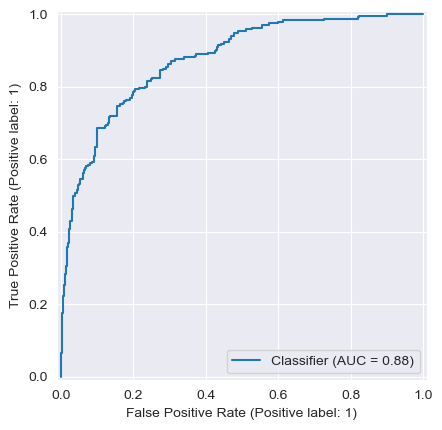

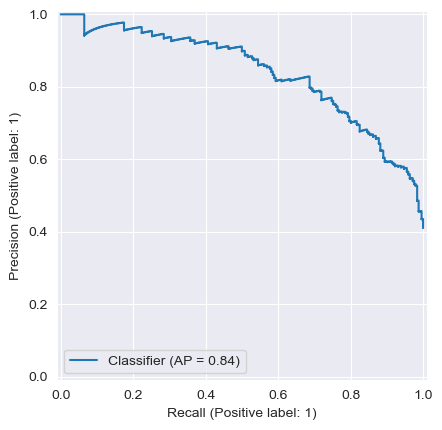

In [14]:
roc = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_best,
)

pr = PrecisionRecallDisplay.from_predictions(
    y_test,
    y_pred_proba_best,
)

roc.figure_.savefig("figures/roc_curve_cv.png")
pr.figure_.savefig("figures/pr_curve_cv.png")



In [15]:
dummy_vs_logregcv = pd.DataFrame(
    {
        "dummy": [accuracy_score(y_test, dummy_pred), precision_score(y_test, dummy_pred, zero_division=0), recall_score(y_test, dummy_pred, zero_division=0), f1_score(y_test, dummy_pred, zero_division=0), roc_auc_score(y_test, dummy_pred_proba)],
        "log_reg_cv": [accuracy_score(y_test, y_pred_best), precision_score(y_test, y_pred_best, zero_division=0), recall_score(y_test, y_pred_best, zero_division=0), f1_score(y_test, y_pred_best, zero_division=0), roc_auc_score(y_test, y_pred_proba_best)],
    },
    index=["accuracy", "precision", "recall", "f1", "roc_auc_score"],
)
display(dummy_vs_logregcv)

,dummy,log_reg_cv
accuracy,0.59,0.800000
precision,0.00,0.794393
recall,0.00,0.691057
f1,0.00,0.739130
roc_auc_score,0.50,0.875660


Бейзлайн намного слабее логистической регрессии с регуляризацией, подобранной с помощью кросс-валидации.

После использования логистической регрессии accuracy выросла на 0.21, roc_auc_score - на 0.376.

Изменение регуляризацией значения C с 1.0 на 15.0 никак не повлияло на метрики качества.

Логистическая регрессия для данной задачи кажется разумной, потому что accuracy и roc_auc_score > 0.5, что свидетельствует о том, что эта модель лучше простого угадывания или неизменного предсказания.